# Tutorial of singscore using built-in data

#### Contributor: Antonio Mora, Chengshu Xie 
#### Date of first version: 2019-01-20
#### Date of last review: 2020-05-26 
#### Summary:

This is the tutorial about using how to use R package `singscore`. We use the built-in data for this tutorial.
 . 

#### Contents:
* [1. Data Preparation](#link1)    <br>
    * [1.1 Prerequisites](#link2)     <br>
    * [1.2 Load and check data](#link3)   <br>
* [2. Method application](#link4)  <br>
    * [2.1 Sample Scoring](#link5)     <br>
* [3. Visualisation and diagnostic functions](#link6)
    * [3.1 Plot Rank Densities](#link7)     <br>
    * [3.2 Plot dispersions of scores](#link8) <br>
    * [3.3 Plot score landscape](#link9)
        
    
## <a id=link1>1. Data Preparation</a>

### <a id=link2>1.1 Prerequisites</a>

R package, `singscore`, needs to be installed and loaded in the R session, this can be done easily with the following chunk of code: 

In [1]:
install.packages("BiocManager")
BiocManager::install("singscore")
BiocManager::install("GSEABase")

suppressPackageStartupMessages(library(singscore))
suppressPackageStartupMessages(library(GSEABase))

### <a id=link3>1.2 Load and check data</a>

The datasets used in this vignette have been built within the package. The `tgfb_expr_10_se` dataset was obtained from (Foroutan et al. 2017) and it is a ten-sample subset of the original dataset. We are going to score the integrated TGFb-treated gene expression dataset (4 cases and 6 controls) against a TGFb gene signature with an up-regulated and down-regulated gene-set pair (Foroutan et al. 2017).

In [2]:
# The example expression dataset and gene signatures are included in the package
# distribution, one can directly access them using the variable names

# To see the description of 'tgfb_expr_10_se','tgfb_gs_up','tgfb_gs_dn', look at 
# Have a look at the object `tgfb_expr_10_se` containing gene expression data for 10 samples 
tgfb_expr_10_se

# View what tgfb_gs_up/dn contains
tgfb_gs_up           
tgfb_gs_dn

# Get the size of the gene sets
length(GSEABase::geneIds(tgfb_gs_up))
length(GSEABase::geneIds(tgfb_gs_dn))

class: SummarizedExperiment 
dim: 11900 10 
metadata(0):
assays(1): counts
rownames(11900): 2 9 ... 729164 752014
rowData names(0):
colnames(10): D_Ctrl_R1 D_TGFb_R1 ... Hil_Ctrl_R1 Hil_Ctrl_R2
colData names(1): Treatment

setName: NA 
geneIds: 19, 87, ..., 402055 (total: 193)
geneIdType: Null
collectionType: Null 
details: use 'details(object)'

setName: NA 
geneIds: 136, 220, ..., 161291 (total: 108)
geneIdType: Null
collectionType: Null 
details: use 'details(object)'

[1] 193

[1] 108

## <a id=link4>2. Method application</a>

### <a id=link5>2.1 Sample Scoring</a>

   To get the sample scores, rank the expression data via `rankGenes()` at first. And then use `simpleScore()` to compute.

In [3]:
# The recommended method for dealing with ties in ranking is 'min', 
# you can change by specifying 'tiesMethod' parameter for rankGenes function.
rankData = rankGenes(tgfb_expr_10_se)
head(rankData)

# Given the ranked data and gene signature, simpleScore returns the scores and 
# dispersions for each sample
scoredf = simpleScore(rankData, upSet = tgfb_gs_up, downSet = tgfb_gs_dn)
head(scoredf)

# To view more details of the simpleScore, use ?simpleScore
# Note that, when only one gene set is available in a gene signature, one can 
# only input values for the upSet argument. In addition, a knownDirection 
# argument can be set to FALSE if the direction of the gene set is unknown.

# simpleScore(rankData, upSet = tgfb_gs_up, knownDirection = FALSE)

,D_Ctrl_R1,D_TGFb_R1,D_Ctrl_R2,D_TGFb_R2,Hes_Ctrl_R1,Hes_TGFb_R1,Hes_Ctrl_R2,Hes_TGFb_R2,Hil_Ctrl_R1,Hil_Ctrl_R2
2,1065,1255,1428,1269,1252,1570,1188,1122,1055,1227
9,6688,7611,6454,6975,6244,7330,7110,7052,6247,7315
10,1741,1599,1541,1686,1777,1638,1713,1418,1558,1849
12,5441,3682,6495,5105,3906,5533,4344,7036,4845,4830
13,3352,3599,3276,3459,3337,3042,3288,3906,3480,3062
14,10442,10013,10146,9917,10382,10085,10061,10029,9731,10268


,TotalScore,TotalDispersion,UpScore,UpDispersion,DownScore,DownDispersion
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
D_Ctrl_R1,-0.088097993,2867.348,0.06096415,3119.390,-0.14906214,2615.306
D_TGFb_R1,0.286994210,2217.970,0.24931565,2352.886,0.03767856,2083.053
D_Ctrl_R2,-0.098964086,2861.418,0.06841242,3129.769,-0.16737650,2593.067
D_TGFb_R2,0.270721958,2378.832,0.25035661,2470.012,0.02036534,2287.652
Hes_Ctrl_R1,-0.002084788,2746.146,0.08046490,3134.216,-0.08254969,2358.075
Hes_TGFb_R1,0.176122839,2597.515,0.22894035,2416.638,-0.05281751,2778.392


## <a id=link6>3. Visualisation and diagnostic functions</a> 

### <a id=link7>3.1 Plot Rank Densities</a> 

`plotRankDensity()` plots the ranks of genes in the gene-sets for a specific sample. 

,D_TGFb_R1
2,1255
9,7611
10,1599
12,3682
13,3599
14,10013


,D_Ctrl_R1,D_TGFb_R1,D_Ctrl_R2,D_TGFb_R2,Hes_Ctrl_R1,Hes_TGFb_R1,Hes_Ctrl_R2,Hes_TGFb_R2,Hil_Ctrl_R1,Hil_Ctrl_R2
9,6688,7611,6454,6975,6244,7330,7110,7052,6247,7315


Warning message:
"Ignoring unknown aesthetics: text"


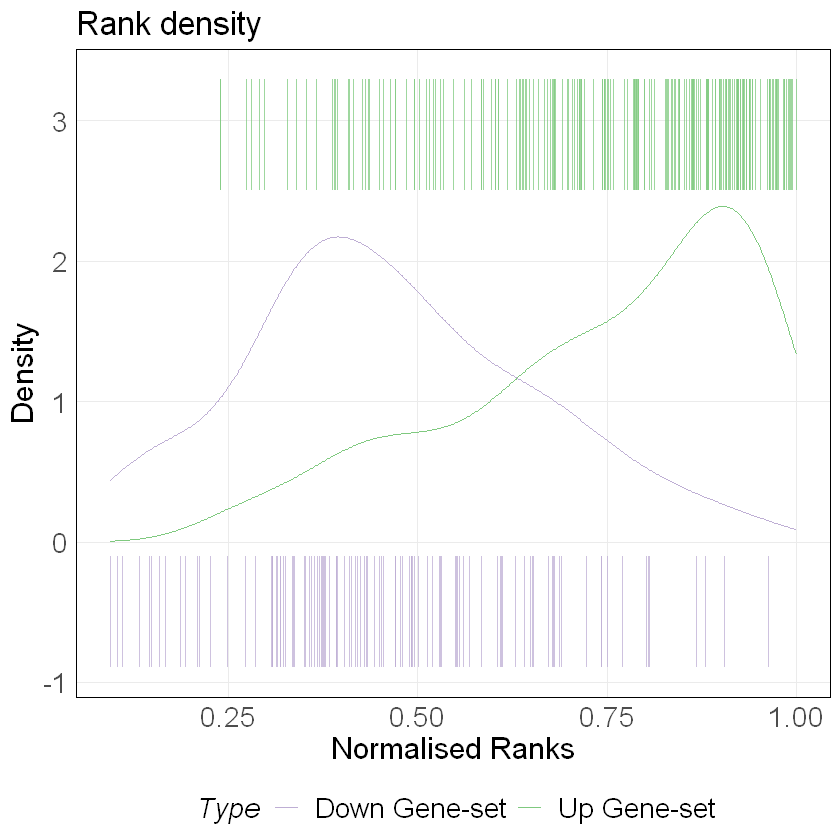

In [4]:
#  You can provide the upSet alone when working with unpaired gene-sets 
# We plot the second sample in rankData, view it by 
head(rankData[, 2, drop = FALSE])
head(rankData[2, , drop = FALSE])

plotRankDensity(rankData[,2,drop = FALSE], upSet = tgfb_gs_up, 
                downSet = tgfb_gs_dn, isInteractive = FALSE)

## Setting `isInteractive = TRUE` generates an interactive plot using the `plotly` package.
## Hovering over the bars in the interactive plot allows you to get information 
## such as the normalised rank (between 0 and 1) and ID of the gene represented by the bar. 
## For the rest of the plotting functions, the isInteractive = TRUE argument has the same behavior.

### <a id=link8>3.2 Plot dispersions of scores</a> 

`plotDispersion()` generates the scatter plots of the `score VS. dispersions` for the total scores, the up scores and the down score of samples.

[1] "Control" "TGFb"    "Control" "TGFb"    "Control" "TGFb"    "Control"
 [8] "TGFb"    "Control" "Control"

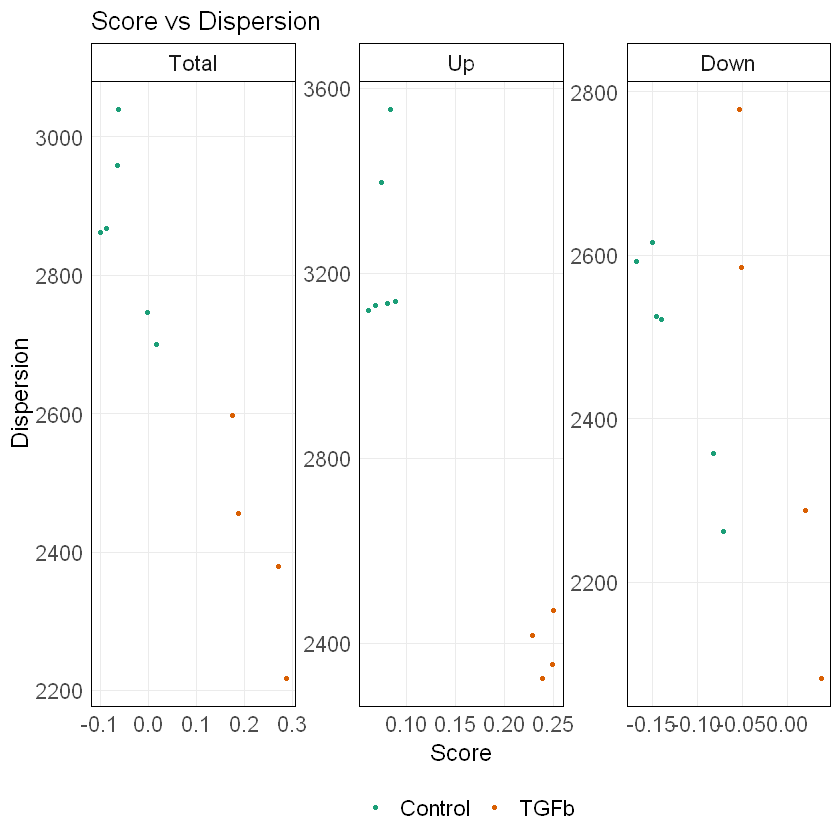

In [5]:
#  Get the annotations of samples by their sample names
tgfbAnnot = data.frame(SampleID = colnames(tgfb_expr_10_se),
                       Type = NA)
tgfbAnnot$Type[grepl("Ctrl", tgfbAnnot$SampleID)] = "Control"
tgfbAnnot$Type[grepl("TGFb", tgfbAnnot$SampleID)] = "TGFb"

# Sample annotations
tgfbAnnot$Type

plotDispersion(scoredf, annot = tgfbAnnot$Type, isInteractive = FALSE)

# To see an interactive version powered by 'plotly', simply set the 
# 'isInteractive' = TRUE, i.e :
#
# plotDispersion(scoredf,annot = tgfbAnnot$Type,isInteractive = TRUE)

### <a id=link9>3.3 Plot score landscape</a> 

`plotScoreLandscape()` plots the scores of the samples against two different gene signatures in a landscape for exploring their relationships.

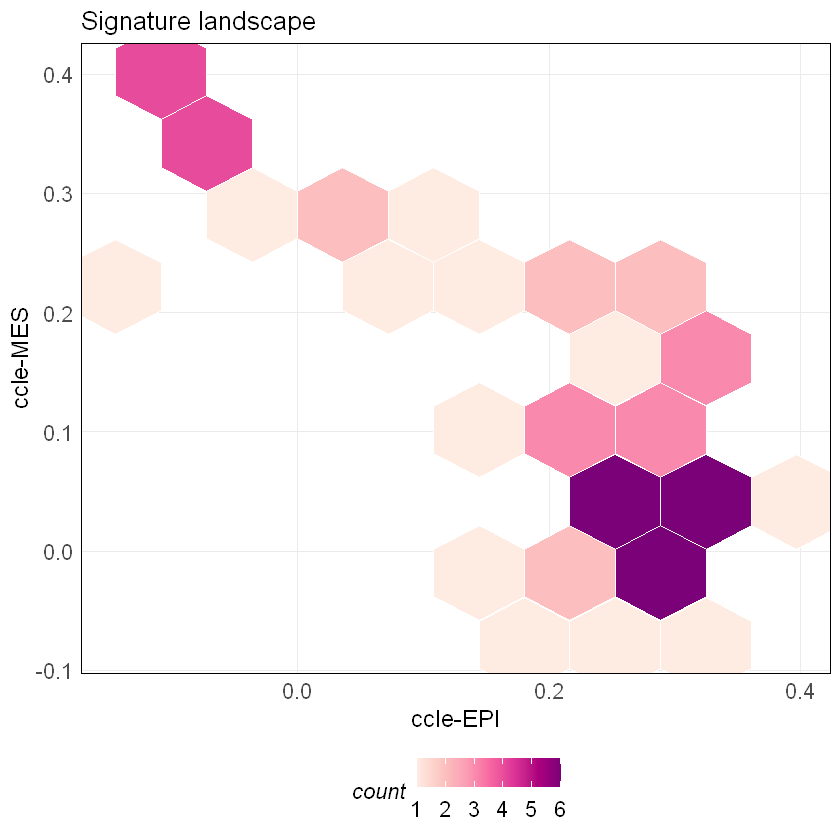

In [6]:
plotScoreLandscape(scoredf_ccle_epi, scoredf_ccle_mes, 
                   scorenames = c('ccle-EPI','ccle-MES'),hexMin = 10)

Similarly, pre-computed scores for the TCGA breast cancer RNA-seq dataset against epithelial and mesenchymal gene signatures are stored in scoredf_tcga_epi and scoredf_tcga_mes respectively (Tan et al. 2014). The utility of this function is enhanced when the number of samples is large.

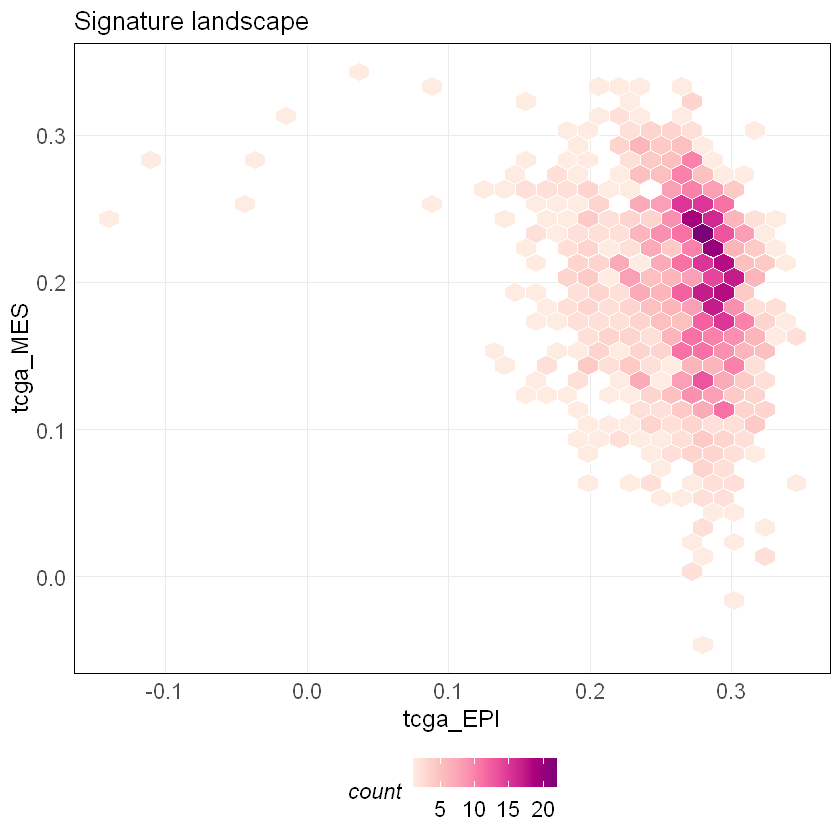

In [7]:
tcgaLandscape = plotScoreLandscape(scoredf_tcga_epi, scoredf_tcga_mes, 
                   scorenames = c('tcga_EPI','tcga_MES'), isInteractive = FALSE)

tcgaLandscape

You can also project new data points onto the landscape plot generated above by using the projectScoreLandscape function. For example, the plot below overlays 3 CCLE samples onto the TCGA epithelial-mesenchymal landscape. Points are labeled with their sample names by default

Warning message:
"Ignoring unknown aesthetics: text"


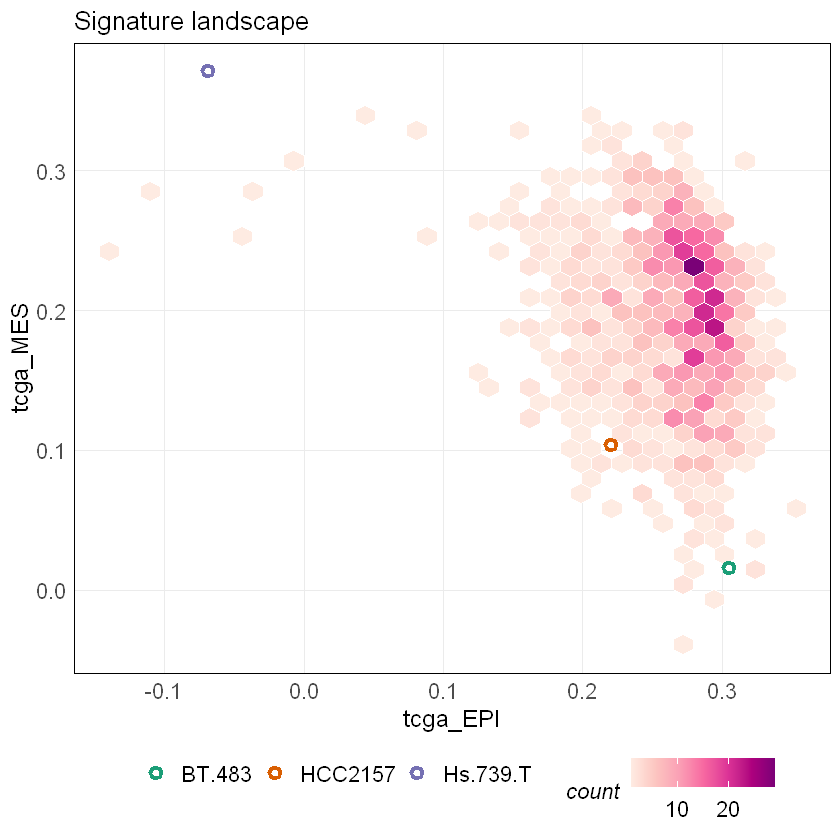

In [8]:
# Project on the above generated 'tcgaLandscape' plot
projectScoreLandscape(plotObj = tcgaLandscape, scoredf_ccle_epi, 
                      scoredf_ccle_mes,
                      subSamples = rownames(scoredf_ccle_epi)[c(1,4,5)],
                      annot = rownames(scoredf_ccle_epi)[c(1,4,5)], 
                      sampleLabels = NULL,
                      isInteractive = FALSE)

Warning message:
"Ignoring unknown aesthetics: text"


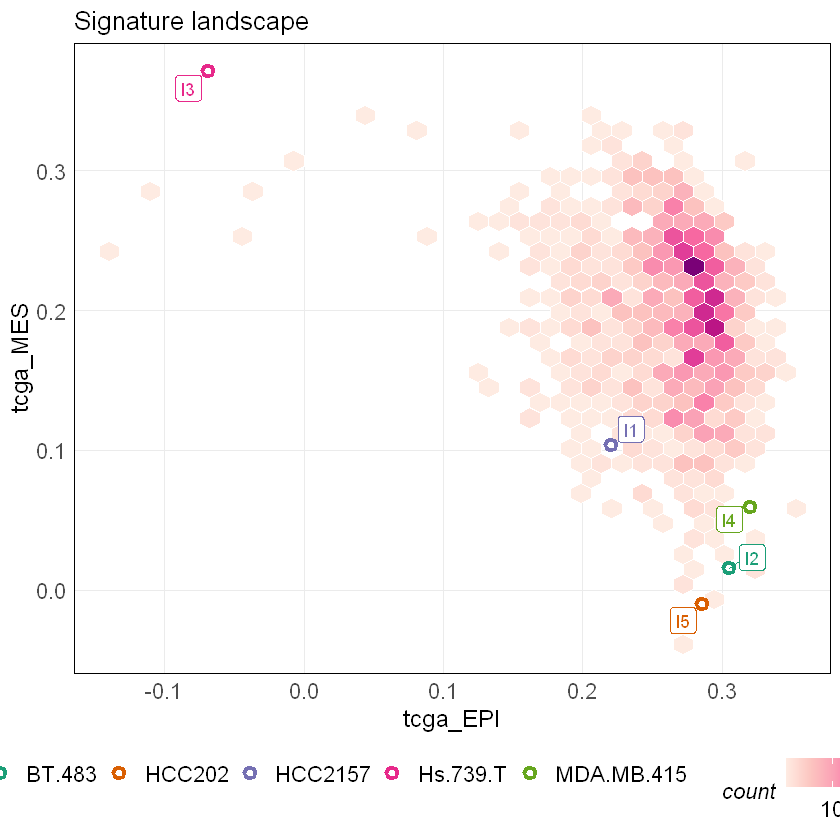

In [9]:
# Custom labels can be provided by passing a character vector to the sampleLabels argument.
projectScoreLandscape(plotObj = tcgaLandscape, scoredf_ccle_epi, scoredf_ccle_mes,
                      subSamples = rownames(scoredf_ccle_epi)[c(1,4,5,8,9)],
                      sampleLabels = c('l1','l2','l3','l4','l5'),
                      annot = rownames(scoredf_ccle_epi)[c(1,4,5,8,9)], 
                      isInteractive = FALSE)

In [10]:
sessionInfo()

R version 4.0.0 (2020-04-24)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows 10 x64 (build 18363)

Matrix products: default

locale:
[1] LC_COLLATE=Chinese (Simplified)_China.936 
[2] LC_CTYPE=Chinese (Simplified)_China.936   
[3] LC_MONETARY=Chinese (Simplified)_China.936
[4] LC_NUMERIC=C                              
[5] LC_TIME=Chinese (Simplified)_China.936    

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] singscore_1.8.0

loaded via a namespace (and not attached):
 [1] ggrepel_0.8.2               locfit_1.5-9.4             
 [3] Rcpp_1.0.4.6                lattice_0.20-41            
 [5] tidyr_1.1.0                 assertthat_0.2.1           
 [7] digest_0.6.25               IRdisplay_0.7.0            
 [9] R6_2.4.1                    GenomeInfoDb_1.24.0        
[11] plyr_1.8.6                  repr_1.1.0                 
[13] stats4_4.0.0                RSQLite_2.2.0              